In [3]:
# packages for Data Analysis
import numpy as np
import pandas as pd

from sklearn import svm

#visualize your data
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline



In [4]:
recipes = pd.read_csv('muffinsvscupcakes.csv')
print (recipes.head())

     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0


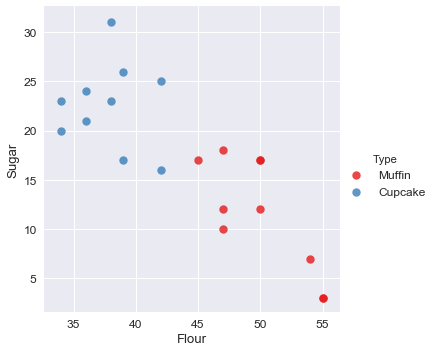

In [5]:
#plot our data
sns.lmplot('Flour','Sugar', data=recipes, hue='Type',
        palette='Set1',fit_reg=False,scatter_kws={"s":70});

In [6]:
#format or pre-process our data
type_label = np.where(recipes['Type']=='Muffin',0,1)
recipe_features = recipes.columns.values[1:].tolist()
recipe_features
ingredients = recipes[['Flour','Sugar']].values
print(ingredients)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [8]:
#fit model
model =svm.SVC(kernel='linear')
model.fit(ingredients,type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
#get the sedarting hyperlane
w = model.coef_[0]
a = -w[0] / w[1]
xx= np.linspace(30,60)
yy= a * xx - (model.intercept_[0]) / w[1-k08


# Plot the parrallels to the seperating hyperlane that pass through the support vectors
b = model.support_vectors_[0]
yy_down =a * xx + (b[1] - a* b[0])
b = model.support_vectors_[-1]
yy_up = a * xx +(b[1] - a * b[0])

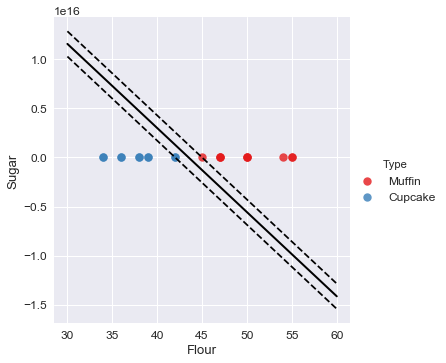

In [10]:
#plot our data
sns.lmplot('Flour','Sugar', data=recipes, hue='Type',
        palette='Set1',fit_reg=False,scatter_kws={"s":70})
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')


In [19]:
#create a function to predict Muffin or cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
       print('You are looking at a muffin recipe!')
    else:
       print('You are looking at a cupcake recipe!')
        
# Predict if n parts of flour and m parts of sugar comes out as muffin or cupcake recipe
muffin_or_cupcake(30, 10)

You are looking at a muffin recipe!


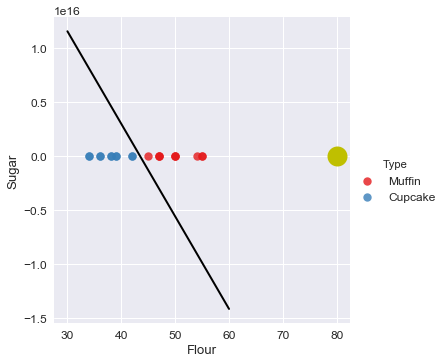

In [21]:
# Lets plot on the graph
sns.lmplot('Flour','Sugar', data=recipes, hue='Type', palette='Set1',fit_reg=False,scatter_kws={"s":70})
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(80,10,'yo',markersize='20')